In [1]:
##### -*-coding:utf-8 -*-
# import all the libraries 
# python==3.8; jupyterlab==3.0.12; lumicks.pylake==0.8.1; matplotlib==3.3.4; more-itertools==8.7.0;
# npTDMS==1.1.0; numpy==1.20.1; opencv-python==4.5.1.48; pandas==1.2.3; scipy==1.6.1; tifffile==2021.3.5
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [28]:
# read the correlated  data from step3:(3_Correlated_segement_analysis).e.g.:cycle#1-correlated_data.xlsx
# cor_name = str('cycle#1-exo-segments.npy')
cor_name = str('cycle#1-pol-segments.npy')
cor_path = input('please type in the file path:')
cor_file = os.path.join(cor_path, cor_name) 

please type in the file path: D:\Google Drive\DNAp_project_updated_jan2022\RawData_ProcessingData\20190529-012-very typical


In [29]:
# the following block is intended to load the dada set
# segment_exo = np.load(cor_file, allow_pickle=True)
segment_pol = np.load(cor_file, allow_pickle=True)
# print(len(segment_exo))
print(len(segment_pol))

7


In [30]:
# This step is to get a three y-axis figure, which shows basepairs, raw intensity and binarized intensity [https://matplotlib.org/3.4.3/gallery/ticks_and_spines/multiple_yaxis_with_spines.html]
def segment_single_plot(segment, ax=None, plt_kwargs={}, sct_kwargs={}):
    if ax is None:
        ax = plt.gca()
        
    time_ROI = segment[0][:,0]
    basepairs_ROI = segment[0][:,1]
    basepairs_fitted_ROI = segment[0][:,2]
    
    time_intens_ROI = segment[1][:,0]
    intensity_ROI = segment[1][:,1]
    intensity_step_ROI = segment[1][:,2]
    intensity_filtered_ROI = segment[1][:,3]
    
    twin1 = ax.twinx()
    # twin2 = ax.twinx()
    # twin3 = ax.twinx()
    
    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    # twin3.spines.right.set_position(("axes", 1.15))
    
    # ax.plot(time_ROI,basepairs_fitted_ROI,"black", label = "step fitted data",linewidth=1)
    ax.plot(time_ROI,basepairs_ROI,"lightgrey",label = "raw data",linewidth=0.5)
    
    ax.set_xlabel('Time/s')
    ax.set_ylabel('Basepairs')
    ax.set_xlim(segment[0][:,0][0],segment[0][:,0][-1])

    
    twin1.plot(time_intens_ROI,intensity_filtered_ROI,color='lightgreen',linewidth=0.8)
    # twin2.plot(time_intens_ROI,intensity_step_ROI,color='green',linewidth=1)
    # twin3.plot(time_intens_ROI,intensity_ROI,color='lightgrey',linewidth=0.5)
    # twin1.yaxis.set_ticklabels([])
    # twin3.yaxis.set_ticklabels([])
    # twin1.yaxis.set_ticks([])
    twin1.set_ylabel('Fluorescence Intensity (a.u.)')
    # twin3.yaxis.set_ticks([])

    # twin2.set_ylabel('Fluorescence Intensity (a.u.)')
    # twin3.set_ylim(0.02,1.05)
    # twin3.fill_between(time_intens_ROI,intensity_ROI, 0,step = "pre", alpha=0.2)

    return(ax)


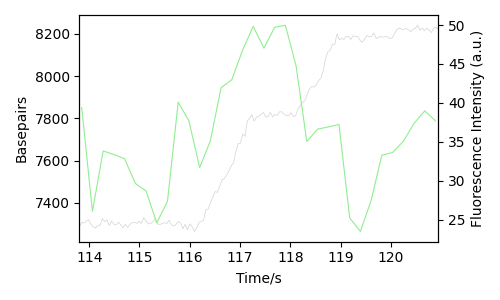

In [32]:
# segment_plots(segment_exo[3]).figure
plt.figure(figsize=(5,3))
segment_single_plot(segment_pol[5])
# segment_single_plot(segment_exo[0])
plt.tight_layout()
plt.show()
# fig.savefig(cor_file[:-20] + 'exo-segments' +'.png', dpi=300)